In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')
from jupyterthemes import jtplot
jtplot.style()

#

In [2]:
F=0.21*(0.95-0.69) + 0.08*(0.95-0.17)
F=0.33*(0.95-0.17)
F=1
surv_rate=0.81 # .30 to .73 95% cf
surv_rate_lb=0.80 # .30 to .73 95% cf
surv_rate_ub=0.92 # .30 to .73 95% cf


In [3]:
prev_lower_bnd=0.028
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA/National_ROC_CURVE_Female.csv'
data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/KPgrant/data/CURVES/CANCER_SKIN/National_ROC_CURVE_Female.csv'

zt=zedstat.processRoc(df=pd.read_csv(data),
           order=3, 
           total_samples=911*1e3,
           positive_samples=33.8*1e3,
           alpha=0.01,
           prevalence=prev_lower_bnd)

In [4]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

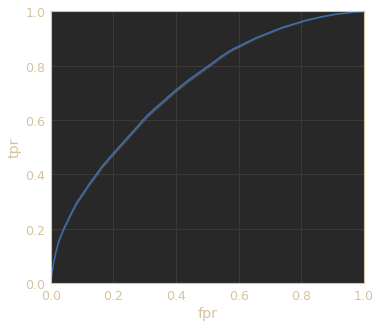

In [5]:
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax)
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='w',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [6]:
zt.auc()

(0.7226196358907672, 0.7273650504179865, 0.717874221363548)

<AxesSubplot:xlabel='LR-'>

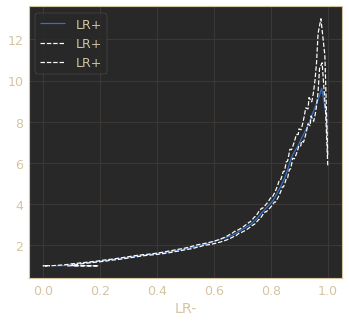

In [7]:
zf=zt.get()
zfu=zt.df_lim['U']
zfl=zt.df_lim['L']
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zf.plot(ax=ax,x='LR-',y='LR+')
zfu.plot(ax=ax,x='LR-',y='LR+',style='--w')
zfl.plot(ax=ax,x='LR-',y='LR+',style='--w')
#ax.set_xlim(0.01,.98)
#ax.set_ylim(0,1)
#ax.set_ylabel('tpr');

In [8]:
ZU=zf+(zfu-zfl)/2
ZL=zf-(zfu-zfl)/2
Z=zf.join(ZU,rsuffix='_upper').join(ZL,rsuffix='_lower')
#ax=Z.plot(x='LR-',y='LR+')
#ax=Z.plot(ax=ax,x='LR-U',y='LR+U')
#ax=Z.plot(ax=ax,x='LR-L',y='LR+L')


In [9]:
Z

,tpr,ppv,acc,npv,LR+,LR-,threshold,tpr_upper,ppv_upper,acc_upper,...,LR+_upper,LR-_upper,threshold_upper,tpr_lower,ppv_lower,acc_lower,npv_lower,LR+_lower,LR-_lower,threshold_lower
fpr,,,,,,,,,,,,,,,,,,,,,
0.000,0.000000,0.137264,0.972000,0.972000,7.398053,1.000000,1.118088,0.000000,0.162683,0.972000,...,7.648481,1.000000,1.118088,0.000000,0.111845,0.972000,0.972000,7.147626,1.000000,1.118088
0.001,0.009846,0.137127,0.971306,0.972241,8.632779,0.991134,0.600400,0.011229,0.155048,0.971345,...,10.016141,0.989750,0.600400,0.008462,0.119207,0.971267,0.972204,7.249417,0.992519,0.600400
0.002,0.023871,0.136923,0.970249,0.972584,9.634678,0.978563,0.081083,0.026010,0.153990,0.970308,...,10.704032,0.976420,0.081083,0.021733,0.119856,0.970189,0.972525,8.565323,0.980706,0.081083
0.003,0.034336,0.136741,0.969249,0.972835,9.205701,0.969342,0.077986,0.036888,0.150600,0.969321,...,10.056111,0.966783,0.077986,0.031785,0.122881,0.969178,0.972765,8.355292,0.971901,0.077986
0.004,0.040622,0.136626,0.968613,0.972986,9.009551,0.963827,0.076519,0.043388,0.148552,0.968691,...,9.701021,0.961050,0.076519,0.037856,0.124701,0.968536,0.972910,8.318082,0.966604,0.076519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.996,0.999703,0.000689,0.031814,0.998487,1.003690,0.051906,0.025304,0.999944,0.000696,0.031821,...,1.003932,-0.008473,0.025304,0.999461,0.000683,0.031808,0.996755,1.003447,0.112284,0.025304
0.997,0.999777,0.000554,0.030861,0.998546,1.002767,0.049754,0.025302,0.999986,0.000560,0.030867,...,1.002977,-0.019968,0.025302,0.999568,0.000549,0.030855,0.996547,1.002558,0.119475,0.025302
0.998,0.999851,0.000420,0.029907,0.998606,1.001845,0.047602,0.025300,1.000022,0.000424,0.029912,...,1.002016,-0.032250,0.025300,0.999681,0.000415,0.029902,0.996157,1.001674,0.127453,0.025300


In [10]:
Z.to_csv(data.replace('.csv','X.csv'))

In [11]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.137264,0.972000,0.972000,7.398053,1.000000,1.118088
0.001,0.009846,0.137127,0.971306,0.972241,8.632779,0.991134,0.600400
0.002,0.023871,0.136923,0.970249,0.972584,9.634678,0.978563,0.081083
0.003,0.034336,0.136741,0.969249,0.972835,9.205701,0.969342,0.077986
0.004,0.040622,0.136626,0.968613,0.972986,9.009551,0.963827,0.076519
...,...,...,...,...,...,...,...
0.996,0.999703,0.000689,0.031814,0.998487,1.003690,0.051906,0.025304
0.997,0.999777,0.000554,0.030861,0.998546,1.002767,0.049754,0.025302
0.998,0.999851,0.000420,0.029907,0.998606,1.001845,0.047602,0.025300


In [17]:
zt.operating_zone(LRminus=.9,LRplus=6)
#display(zt._operating_zone)
P=20000*0.028
rf0,txt0,resdf0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=P,
                      five_yr_survival=surv_rate,factor=F)

rf0,txt0lb,resdf0lb=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=P,
                      five_yr_survival=surv_rate_lb,factor=F)

rf0,txt0ub,resdf0ub=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=P,
                      five_yr_survival=surv_rate_ub,factor=F)


rf1,txt1,resdf1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=P,
                      five_yr_survival=surv_rate,factor=F)
rf1,txt1,resdf1ub=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=P,
                      five_yr_survival=surv_rate_ub,factor=F)
rf1,txt1,resdf1lb=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=P,
                      five_yr_survival=surv_rate_lb,factor=F)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))
zop=zt._operating_zone
zop['NNS'] = [resdf0ub.T.NNS.values[0],resdf1ub.T.NNS.values[0]]
display(zop)

display(resdf0lb)
display(resdf0)
display(resdf0ub)
display(resdf1)
display(resdf1lb)
display(resdf1ub)


high precision operation:
 For every 560.0 positive instances
 we raise 605 flags,
 out of which 82 are true positives
 524 are false alarms
 478 cases are missed
 Number needed to screen is 39.0254713289968


high recall operation:
 For every 560.0 positive instances
 we raise 680 flags,
 out of which 91 are true positives
 589 are false alarms
 469 cases are missed
 Number needed to screen is 37.378126708369116


,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold,NNS
high precision,0.017,0.120936,0.134825,0.958095,0.974867,6.821171,0.894967,0.061036,93.0
high sensitivity,0.025,0.153725,0.133785,0.951641,0.975598,6.083612,0.868292,0.052920,93.0


,estimates
POS,560.00
TP,82.00
FP,524.00
NEG,19440.00
FLAGS,605.00
FN,478.00
TN,18916.00
NNS,37.00
FLAGGED_FRACTION,0.03


,estimates
POS,560.00
TP,82.00
FP,524.00
NEG,19440.00
FLAGS,605.00
FN,478.00
TN,18916.00
NNS,39.00
FLAGGED_FRACTION,0.03


,estimates
POS,560.00
TP,82.00
FP,524.00
NEG,19440.00
FLAGS,605.00
FN,478.00
TN,18916.00
NNS,93.00
FLAGGED_FRACTION,0.03


,estimates
POS,560.00
TP,91.00
FP,589.00
NEG,19440.00
FLAGS,680.00
FN,469.00
TN,18851.00
NNS,39.00
FLAGGED_FRACTION,0.03


,estimates
POS,560.00
TP,91.00
FP,589.00
NEG,19440.00
FLAGS,680.00
FN,469.00
TN,18851.00
NNS,37.00
FLAGGED_FRACTION,0.03


,estimates
POS,560.00
TP,91.00
FP,589.00
NEG,19440.00
FLAGS,680.00
FN,469.00
TN,18851.00
NNS,93.00
FLAGGED_FRACTION,0.03


## writing tables to latex

In [13]:
from zedstat.textable import textable
#textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [14]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.001,$0.020 \pm 0.003$,$0.026 \pm 0.013$,$0.994 \pm 1.587$,$0.996 \pm 1.582$,$14.72 \pm 3.967$,$0.981 \pm 0.003$,0.008912
0.006,$0.039 \pm 0.005$,$0.026 \pm 0.002$,$0.990 \pm 2.190$,$0.996 \pm 2.195$,$7.014 \pm 0.912$,$0.966 \pm 0.005$,0.006113


In [15]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     

In [16]:
! cat tmp.tex


\begin{tabular}{L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}}\hline
fpr&tpr&ppv&acc&npv&LR+&LR-&threshold\\\hline
0.000& $0.0  \pm  0.0$ & $0.026  \pm  0.014$ & $0.996  \pm  0.0$ & $0.996  \pm  0.0$ & $15.93  \pm  0.469$ & $1.0  \pm  0.0$ &1.029\\\hline
0.001& $0.020  \pm  0.003$ & $0.026  \pm  0.013$ & $0.994  \pm  1.587$ & $0.996  \pm  1.582$ & $14.72  \pm  3.967$ & $0.981  \pm  0.003$ &0.009\\\hline
0.002& $0.026  \pm  0.004$ & $0.026  \pm  0.008$ & $0.993  \pm  1.793$ & $0.996  \pm  1.790$ & $10.55  \pm  2.241$ & $0.976  \pm  0.004$ &0.007\\\hline
0.003& $0.029  \pm  0.004$ & $0.026  \pm  0.005$ & $0.992  \pm  1.901$ & $0.996  \pm  1.900$ & $9.666  \pm  1.584$ & $0.974  \pm  0.004$ &0.007\\\hline
0.004& $0.032  \pm  0.005$ & $0.026  \pm  0.004$ & $0.991  \pm  2.003$ & $0.996  \pm  2.003$ & $8.782  \pm  1.251$ & $0.971  \pm  0.005$ &0.007\\\hline
0.005& $0.036  \pm  0.005$ & $0.026  \pm  0.003$ & $0.990  \pm  2.099$ & $0.996  \pm  2.101$ & $7.898  \pm  1.049$ & $0.968  \p